In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, accuracy_score, roc_curve, roc_auc_score,log_loss
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, OneHotEncoder,MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet, LogisticRegression, LinearRegression
from sklearn.compose import make_column_transformer, make_column_selector
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [2]:
hr_df = pd.read_csv("HR_comma_sep.csv")

In [3]:
hr_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [4]:
X = hr_df.drop('left',axis = 1)
y = hr_df['left']


In [5]:
# train test Split

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 24,test_size = 0.3,stratify=y)
# stratify -> after this results should improve if not that's coincidence
print(y_train.value_counts(normalize = True)*100)
print(y_test.value_counts(normalize = True)*100)

left
0    76.209985
1    23.790015
Name: proportion, dtype: float64
left
0    76.216937
1    23.783063
Name: proportion, dtype: float64


In [49]:
scaler_mm = MinMaxScaler()
scaler_std = StandardScaler()

In [96]:
#using make_column_selector(dtype_exclude = ) & dtype_include= 
lr = LogisticRegression(multi_class = 'multinomial',random_state =24)
ohe = OneHotEncoder(drop = 'first', handle_unknown = 'ignore', sparse_output = False).set_output(transform='pandas')
ct = make_column_transformer(('passthrough',make_column_selector(dtype_exclude = object) ),(ohe,make_column_selector(dtype_include = object) ),verbose_feature_names_out = False).set_output(transform='pandas')
knn = KNeighborsClassifier(n_neighbors=1)
pipe = Pipeline([('CT',ct),('SCL',scaler_std),('KNN',knn)])
#ct.fit_transform(hr_df)

In [98]:
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print(accuracy_score(y_test,y_pred))


0.960880195599022


In [104]:
y_pred_prob = pipe.predict_proba(X_test)

In [108]:
print(log_loss(y_test, y_pred_prob))


1.4100206704789109


In [143]:
## Grid search

kfold = StratifiedKFold(n_splits=5, random_state=24,shuffle=True)

In [121]:
pipe = Pipeline([('CT',ct),('SCL',scaler_std),('KNN',knn)])

In [133]:
pipe.get_params()


{'memory': None,
 'steps': [('CT',
   ColumnTransformer(transformers=[('passthrough', 'passthrough',
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x000001EF45E4D6A0>),
                                   ('onehotencoder',
                                    OneHotEncoder(drop='first',
                                                  handle_unknown='ignore',
                                                  sparse_output=False),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x000001EF45E4DC10>)],
                     verbose_feature_names_out=False)),
  ('SCL', StandardScaler()),
  ('KNN', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'CT': ColumnTransformer(transformers=[('passthrough', 'passthrough',
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001EF45E4D6A0>),
                                 ('

In [135]:
params = {'KNN__n_neighbors':np.arange(1, 11),
        'SCL':[scaler_mm,scaler_std,None]}

In [145]:
#gcv = GridSearchCV(pipe, param_grid = params,cv=kfold, verbose=3)
gcv = GridSearchCV(pipe, param_grid = params,scoring = 'neg_log_loss',cv=kfold, verbose=3)

In [147]:
gcv.fit(X,y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END KNN__n_neighbors=1, SCL=MinMaxScaler();, score=-1.202 total time=   0.1s
[CV 2/5] END KNN__n_neighbors=1, SCL=MinMaxScaler();, score=-1.262 total time=   0.1s
[CV 3/5] END KNN__n_neighbors=1, SCL=MinMaxScaler();, score=-1.142 total time=   0.1s
[CV 4/5] END KNN__n_neighbors=1, SCL=MinMaxScaler();, score=-1.106 total time=   0.1s
[CV 5/5] END KNN__n_neighbors=1, SCL=MinMaxScaler();, score=-1.118 total time=   0.1s
[CV 1/5] END KNN__n_neighbors=1, SCL=StandardScaler();, score=-1.274 total time=   0.1s
[CV 2/5] END KNN__n_neighbors=1, SCL=StandardScaler();, score=-1.238 total time=   0.1s
[CV 3/5] END KNN__n_neighbors=1, SCL=StandardScaler();, score=-1.166 total time=   0.1s
[CV 4/5] END KNN__n_neighbors=1, SCL=StandardScaler();, score=-1.106 total time=   0.1s
[CV 5/5] END KNN__n_neighbors=1, SCL=StandardScaler();, score=-1.106 total time=   0.1s
[CV 1/5] END .....KNN__n_neighbors=1, SCL=None;, score=-1.550 total 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=Pipeline(steps=[('CT',
                                        ColumnTransformer(transformers=[('passthrough',
                                                                         'passthrough',
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001EF45E4D6A0>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001EF45E4DC10>)],
                                                          verbose_feature_names_out=False)),
                                       ('SCL', StandardScaler()),
                                       ('KNN',
                                        KNeighborsClassifier(n_neighbors=1))]),
             param_grid={'KNN__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'SCL': [MinMaxScaler(), StandardScaler(), None]},
             scoring='neg_log_loss', verbose=3)

In [155]:
print(gcv.best_params_)
print(gcv.best_score_)
pd_cv = pd.DataFrame(gcv.cv_results_)
print(pd_cv.shape)


{'KNN__n_neighbors': 10, 'SCL': StandardScaler()}
-0.46380636508556156
(30, 15)
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.034704      0.007252         0.158655        0.018946   
1        0.031512      0.003467         0.141630        0.006971   
2        0.022110      0.000370         0.152845        0.013771   
3        0.027611      0.001162         0.146443        0.009282   
4        0.030704      0.005210         0.144938        0.008760   
5        0.026904      0.007878         0.151856        0.016444   
6        0.027408      0.002225         0.149542        0.005593   
7        0.028903      0.001428         0.154454        0.010978   
8        0.022607      0.001597         0.155838        0.012731   
9        0.028522      0.002784         0.158402        0.011710   
10       0.029105      0.002293         0.161430        0.010205   
11       0.022509      0.001683         0.147974        0.012006   
12       0.027905      0.003262     

In [157]:
pd_cv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_KNN__n_neighbors,param_SCL,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.034704,0.007252,0.158655,0.018946,1,MinMaxScaler(),"{'KNN__n_neighbors': 1, 'SCL': MinMaxScaler()}",-1.201856,-1.261949,-1.141763,-1.105707,-1.117726,-1.165800,0.058386,28
1,0.031512,0.003467,0.141630,0.006971,1,StandardScaler(),"{'KNN__n_neighbors': 1, 'SCL': StandardScaler()}",-1.273967,-1.237911,-1.165800,-1.105707,-1.105707,-1.177819,0.068411,29
2,0.022110,0.000370,0.152845,0.013771,1,None,"{'KNN__n_neighbors': 1, 'SCL': None}",-1.550394,-1.622505,-1.682598,-1.394153,-1.466264,-1.543183,0.103834,30
3,0.027611,0.001162,0.146443,0.009282,2,MinMaxScaler(),"{'KNN__n_neighbors': 2, 'SCL': MinMaxScaler()}",-1.010714,-0.954320,-0.867647,-0.777277,-0.857016,-0.893395,0.081173,25
4,0.030704,0.005210,0.144938,0.008760,2,StandardScaler(),"{'KNN__n_neighbors': 2, 'SCL': StandardScaler()}",-0.965645,-0.954089,-0.869728,-0.774735,-0.843841,-0.881607,0.071141,24
5,0.026904,0.007878,0.151856,0.016444,2,None,"{'KNN__n_neighbors': 2, 'SCL': None}",-1.143381,-1.175970,-1.153782,-0.976277,-0.958018,-1.081485,0.094126,27
6,0.027408,0.002225,0.149542,0.005593,3,MinMaxScaler(),"{'KNN__n_neighbors': 3, 'SCL': MinMaxScaler()}",-0.853438,-0.751560,-0.672410,-0.584438,-0.599095,-0.692188,0.100194,22
7,0.028903,0.001428,0.154454,0.010978,3,StandardScaler(),"{'KNN__n_neighbors': 3, 'SCL': StandardScaler()}",-0.770503,-0.748956,-0.697777,-0.607337,-0.608222,-0.686559,0.068525,21
8,0.022607,0.001597,0.155838,0.012731,3,None,"{'KNN__n_neighbors': 3, 'SCL': None}",-1.022532,-0.891217,-1.008224,-0.797380,-0.793172,-0.902505,0.098707,26
9,0.028522,0.002784,0.158402,0.011710,4,MinMaxScaler(),"{'KNN__n_neighbors': 4, 'SCL': MinMaxScaler()}",-0.725743,-0.670312,-0.577857,-0.572231,-0.495162,-0.608261,0.080828,19


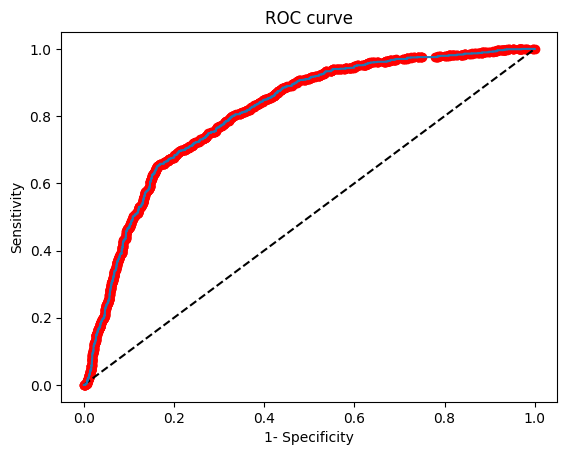

ROC_AUC_Score 0.8100274459462038


In [64]:
plt.plot([0,1],[0,1],'k--')
plt.plot(m1spec,sens)
plt.scatter(m1spec,sens,c='red')
plt.xlabel('1- Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC curve')
plt.show()
print("ROC_AUC_Score",roc_auc_score(y_test,p_y_1))

In [65]:
kfold = StratifiedKFold(n_splits=5, random_state=24,shuffle=True)

In [66]:
scaler_mm = MinMaxScaler()
scaler_std = StandardScaler()

In [67]:
params = {'LR__solver':['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga'],
          'LR__C':np.linspace(0.001, 10, 20),
        'SCL':[scaler_mm,scaler_std,None]}

In [68]:
gcv = GridSearchCV(pipe, param_grid = params,scoring = 'roc_auc',cv=kfold, verbose=3)

In [69]:
gcv.fit(X,y)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
[CV 1/5] END LR__C=0.001, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.783 total time=   0.0s
[CV 2/5] END LR__C=0.001, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.766 total time=   0.0s
[CV 3/5] END LR__C=0.001, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.788 total time=   0.0s
[CV 4/5] END LR__C=0.001, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.780 total time=   0.0s
[CV 5/5] END LR__C=0.001, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.797 total time=   0.0s
[CV 1/5] END LR__C=0.001, LR__solver=lbfgs, SCL=StandardScaler();, score=0.817 total time=   0.0s
[CV 2/5] END LR__C=0.001, LR__solver=lbfgs, SCL=StandardScaler();, score=0.804 total time=   0.0s
[CV 3/5] END LR__C=0.001, LR__solver=lbfgs, SCL=StandardScaler();, score=0.817 total time=   0.0s
[CV 4/5] END LR__C=0.001, LR__solver=lbfgs, SCL=StandardScaler();, score=0.811 total time=   0.0s
[CV 5/5] END LR__C=0.001, LR__solver=lbfgs, SCL=StandardScaler()

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=0.001, LR__solver=lbfgs, SCL=None;, score=0.798 total time=   0.2s
[CV 2/5] END LR__C=0.001, LR__solver=lbfgs, SCL=None;, score=0.765 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

[CV 3/5] END LR__C=0.001, LR__solver=lbfgs, SCL=None;, score=0.784 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=0.001, LR__solver=lbfgs, SCL=None;, score=0.782 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=0.001, LR__solver=lbfgs, SCL=None;, score=0.785 total time=   0.2s
[CV 1/5] END LR__C=0.001, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.001, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.001, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.001, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=0.001, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=0.001, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.001, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.001, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.001, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=0.001

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=0.001, LR__solver=sag, SCL=None;, score=0.808 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=0.001, LR__solver=sag, SCL=None;, score=0.785 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=0.001, LR__solver=sag, SCL=None;, score=0.807 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=0.001, LR__solver=sag, SCL=None;, score=0.804 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=0.001, LR__solver=sag, SCL=None;, score=0.804 total time=   0.5s
[CV 1/5] END LR__C=0.001, LR__solver=saga, SCL=MinMaxScaler();, score=0.783 total time=   0.1s
[CV 2/5] END LR__C=0.001, LR__solver=saga, SCL=MinMaxScaler();, score=0.766 total time=   0.1s
[CV 3/5] END LR__C=0.001, LR__solver=saga, SCL=MinMaxScaler();, score=0.788 total time=   0.1s
[CV 4/5] END LR__C=0.001, LR__solver=saga, SCL=MinMaxScaler();, score=0.780 total time=   0.1s
[CV 5/5] END LR__C=0.001, LR__solver=saga, SCL=MinMaxScaler();, score=0.797 total time=   0.1s
[CV 1/5] END LR__C=0.001, LR__solver=saga, SCL=StandardScaler();, score=0.817 total time=   0.0s
[CV 2/5] END LR__C=0.001, LR__solver=saga, SCL=StandardScaler();, score=0.804 total time=   0.0s
[CV 3/5] END LR__C=0.001, LR__solver=saga, SCL=StandardScaler();, score=0.817 total time=   0.0s
[CV 4/5] END LR__C=0.001, LR__solver=saga, SCL=StandardScaler();, score=0.811 total time=   0.1s
[CV 5/5] END LR__C=0.001, LR__solver=saga, SCL=Standa

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=0.001, LR__solver=saga, SCL=None;, score=0.788 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=0.001, LR__solver=saga, SCL=None;, score=0.772 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=0.001, LR__solver=saga, SCL=None;, score=0.792 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=0.001, LR__solver=saga, SCL=None;, score=0.790 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=0.001, LR__solver=saga, SCL=None;, score=0.788 total time=   0.5s
[CV 1/5] END LR__C=0.5272631578947369, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=0.5272631578947369, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=0.5272631578947369, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=0.5272631578947369, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.816 total time=   0.0s
[CV 5/5] END LR__C=0.5272631578947369, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.827 total time=   0.0s
[CV 1/5] END LR__C=0.5272631578947369, LR__solver=lbfgs, SCL=StandardScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=0.5272631578947369, LR__solver=lbfgs, SCL=StandardScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=0.5272631578947369, LR__solver=lbfgs, SCL=StandardScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=0.5272631578947369

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=0.5272631578947369, LR__solver=lbfgs, SCL=None;, score=0.813 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=0.5272631578947369, LR__solver=lbfgs, SCL=None;, score=0.805 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END LR__C=0.5272631578947369, LR__solver=lbfgs, SCL=None;, score=0.819 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=0.5272631578947369, LR__solver=lbfgs, SCL=None;, score=0.812 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=0.5272631578947369, LR__solver=lbfgs, SCL=None;, score=0.826 total time=   0.2s
[CV 1/5] END LR__C=0.5272631578947369, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.5272631578947369, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.5272631578947369, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=0.5272631578947369, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=0.5272631578947369, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=0.5272631578947369, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=0.5272631578947369, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=0.5272631578947369, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/5

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=0.5272631578947369, LR__solver=sag, SCL=None;, score=0.819 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=0.5272631578947369, LR__solver=sag, SCL=None;, score=0.802 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=0.5272631578947369, LR__solver=sag, SCL=None;, score=0.818 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=0.5272631578947369, LR__solver=sag, SCL=None;, score=0.813 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=0.5272631578947369, LR__solver=sag, SCL=None;, score=0.820 total time=   0.5s
[CV 1/5] END LR__C=0.5272631578947369, LR__solver=saga, SCL=MinMaxScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=0.5272631578947369, LR__solver=saga, SCL=MinMaxScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=0.5272631578947369, LR__solver=saga, SCL=MinMaxScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=0.5272631578947369, LR__solver=saga, SCL=MinMaxScaler();, score=0.816 total time=   0.1s
[CV 5/5] END LR__C=0.5272631578947369, LR__solver=saga, SCL=MinMaxScaler();, score=0.827 total time=   0.1s
[CV 1/5] END LR__C=0.5272631578947369, LR__solver=saga, SCL=StandardScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=0.5272631578947369, LR__solver=saga, SCL=StandardScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=0.5272631578947369, LR__solver=saga, SCL=StandardScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=0.527263157894

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=0.5272631578947369, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=0.5272631578947369, LR__solver=saga, SCL=None;, score=0.792 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=0.5272631578947369, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=0.5272631578947369, LR__solver=saga, SCL=None;, score=0.807 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=0.5272631578947369, LR__solver=saga, SCL=None;, score=0.814 total time=   0.5s
[CV 1/5] END LR__C=1.0535263157894736, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=1.0535263157894736, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=1.0535263157894736, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=1.0535263157894736, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.816 total time=   0.0s
[CV 5/5] END LR__C=1.0535263157894736, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.827 total time=   0.0s
[CV 1/5] END LR__C=1.0535263157894736, LR__solver=lbfgs, SCL=StandardScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=1.0535263157894736, LR__solver=lbfgs, SCL=StandardScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=1.0535263157894736, LR__solver=lbfgs, SCL=StandardScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=1.053

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=1.0535263157894736, LR__solver=lbfgs, SCL=None;, score=0.815 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=1.0535263157894736, LR__solver=lbfgs, SCL=None;, score=0.805 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END LR__C=1.0535263157894736, LR__solver=lbfgs, SCL=None;, score=0.815 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=1.0535263157894736, LR__solver=lbfgs, SCL=None;, score=0.812 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=1.0535263157894736, LR__solver=lbfgs, SCL=None;, score=0.821 total time=   0.2s
[CV 1/5] END LR__C=1.0535263157894736, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=1.0535263157894736, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=1.0535263157894736, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=1.0535263157894736, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=1.0535263157894736, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=1.0535263157894736, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=1.0535263157894736, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=1.0535263157894736, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/5

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=1.0535263157894736, LR__solver=sag, SCL=None;, score=0.819 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=1.0535263157894736, LR__solver=sag, SCL=None;, score=0.802 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=1.0535263157894736, LR__solver=sag, SCL=None;, score=0.818 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=1.0535263157894736, LR__solver=sag, SCL=None;, score=0.813 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=1.0535263157894736, LR__solver=sag, SCL=None;, score=0.820 total time=   0.4s
[CV 1/5] END LR__C=1.0535263157894736, LR__solver=saga, SCL=MinMaxScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=1.0535263157894736, LR__solver=saga, SCL=MinMaxScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=1.0535263157894736, LR__solver=saga, SCL=MinMaxScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=1.0535263157894736, LR__solver=saga, SCL=MinMaxScaler();, score=0.816 total time=   0.1s
[CV 5/5] END LR__C=1.0535263157894736, LR__solver=saga, SCL=MinMaxScaler();, score=0.827 total time=   0.1s
[CV 1/5] END LR__C=1.0535263157894736, LR__solver=saga, SCL=StandardScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=1.0535263157894736, LR__solver=saga, SCL=StandardScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=1.0535263157894736, LR__solver=saga, SCL=StandardScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=1.053526315789

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=1.0535263157894736, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=1.0535263157894736, LR__solver=saga, SCL=None;, score=0.792 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=1.0535263157894736, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=1.0535263157894736, LR__solver=saga, SCL=None;, score=0.807 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=1.0535263157894736, LR__solver=saga, SCL=None;, score=0.814 total time=   0.5s
[CV 1/5] END LR__C=1.5797894736842104, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=1.5797894736842104, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=1.5797894736842104, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=1.5797894736842104, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.816 total time=   0.0s
[CV 5/5] END LR__C=1.5797894736842104, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.827 total time=   0.0s
[CV 1/5] END LR__C=1.5797894736842104, LR__solver=lbfgs, SCL=StandardScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=1.5797894736842104, LR__solver=lbfgs, SCL=StandardScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=1.5797894736842104, LR__solver=lbfgs, SCL=StandardScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=1.579

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=1.5797894736842104, LR__solver=lbfgs, SCL=None;, score=0.814 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=1.5797894736842104, LR__solver=lbfgs, SCL=None;, score=0.805 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END LR__C=1.5797894736842104, LR__solver=lbfgs, SCL=None;, score=0.819 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=1.5797894736842104, LR__solver=lbfgs, SCL=None;, score=0.810 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=1.5797894736842104, LR__solver=lbfgs, SCL=None;, score=0.822 total time=   0.2s
[CV 1/5] END LR__C=1.5797894736842104, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=1.5797894736842104, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=1.5797894736842104, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=1.5797894736842104, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=1.5797894736842104, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=1.5797894736842104, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=1.5797894736842104, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=1.5797894736842104, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/5

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=1.5797894736842104, LR__solver=sag, SCL=None;, score=0.819 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=1.5797894736842104, LR__solver=sag, SCL=None;, score=0.802 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=1.5797894736842104, LR__solver=sag, SCL=None;, score=0.818 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=1.5797894736842104, LR__solver=sag, SCL=None;, score=0.813 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=1.5797894736842104, LR__solver=sag, SCL=None;, score=0.820 total time=   0.5s
[CV 1/5] END LR__C=1.5797894736842104, LR__solver=saga, SCL=MinMaxScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=1.5797894736842104, LR__solver=saga, SCL=MinMaxScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=1.5797894736842104, LR__solver=saga, SCL=MinMaxScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=1.5797894736842104, LR__solver=saga, SCL=MinMaxScaler();, score=0.816 total time=   0.1s
[CV 5/5] END LR__C=1.5797894736842104, LR__solver=saga, SCL=MinMaxScaler();, score=0.827 total time=   0.1s
[CV 1/5] END LR__C=1.5797894736842104, LR__solver=saga, SCL=StandardScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=1.5797894736842104, LR__solver=saga, SCL=StandardScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=1.5797894736842104, LR__solver=saga, SCL=StandardScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=1.579789473684

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=1.5797894736842104, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=1.5797894736842104, LR__solver=saga, SCL=None;, score=0.792 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=1.5797894736842104, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=1.5797894736842104, LR__solver=saga, SCL=None;, score=0.807 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=1.5797894736842104, LR__solver=saga, SCL=None;, score=0.814 total time=   0.5s
[CV 1/5] END LR__C=2.1060526315789474, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=2.1060526315789474, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=2.1060526315789474, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=2.1060526315789474, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.816 total time=   0.0s
[CV 5/5] END LR__C=2.1060526315789474, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.827 total time=   0.0s
[CV 1/5] END LR__C=2.1060526315789474, LR__solver=lbfgs, SCL=StandardScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=2.1060526315789474, LR__solver=lbfgs, SCL=StandardScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=2.1060526315789474, LR__solver=lbfgs, SCL=StandardScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=2.106

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=2.1060526315789474, LR__solver=lbfgs, SCL=None;, score=0.818 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=2.1060526315789474, LR__solver=lbfgs, SCL=None;, score=0.806 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END LR__C=2.1060526315789474, LR__solver=lbfgs, SCL=None;, score=0.819 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=2.1060526315789474, LR__solver=lbfgs, SCL=None;, score=0.812 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=2.1060526315789474, LR__solver=lbfgs, SCL=None;, score=0.822 total time=   0.2s
[CV 1/5] END LR__C=2.1060526315789474, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=2.1060526315789474, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=2.1060526315789474, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=2.1060526315789474, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=2.1060526315789474, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=2.1060526315789474, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=2.1060526315789474, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=2.1060526315789474, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/5

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=2.1060526315789474, LR__solver=sag, SCL=None;, score=0.819 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=2.1060526315789474, LR__solver=sag, SCL=None;, score=0.802 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=2.1060526315789474, LR__solver=sag, SCL=None;, score=0.818 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=2.1060526315789474, LR__solver=sag, SCL=None;, score=0.813 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=2.1060526315789474, LR__solver=sag, SCL=None;, score=0.820 total time=   0.4s
[CV 1/5] END LR__C=2.1060526315789474, LR__solver=saga, SCL=MinMaxScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=2.1060526315789474, LR__solver=saga, SCL=MinMaxScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=2.1060526315789474, LR__solver=saga, SCL=MinMaxScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=2.1060526315789474, LR__solver=saga, SCL=MinMaxScaler();, score=0.816 total time=   0.1s
[CV 5/5] END LR__C=2.1060526315789474, LR__solver=saga, SCL=MinMaxScaler();, score=0.827 total time=   0.1s
[CV 1/5] END LR__C=2.1060526315789474, LR__solver=saga, SCL=StandardScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=2.1060526315789474, LR__solver=saga, SCL=StandardScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=2.1060526315789474, LR__solver=saga, SCL=StandardScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=2.106052631578

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=2.1060526315789474, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=2.1060526315789474, LR__solver=saga, SCL=None;, score=0.792 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=2.1060526315789474, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=2.1060526315789474, LR__solver=saga, SCL=None;, score=0.807 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=2.1060526315789474, LR__solver=saga, SCL=None;, score=0.814 total time=   0.5s
[CV 1/5] END LR__C=2.6323157894736844, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=2.6323157894736844, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=2.6323157894736844, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=2.6323157894736844, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.816 total time=   0.0s
[CV 5/5] END LR__C=2.6323157894736844, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.827 total time=   0.0s
[CV 1/5] END LR__C=2.6323157894736844, LR__solver=lbfgs, SCL=StandardScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=2.6323157894736844, LR__solver=lbfgs, SCL=StandardScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=2.6323157894736844, LR__solver=lbfgs, SCL=StandardScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=2.632

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=2.6323157894736844, LR__solver=lbfgs, SCL=None;, score=0.816 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=2.6323157894736844, LR__solver=lbfgs, SCL=None;, score=0.805 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END LR__C=2.6323157894736844, LR__solver=lbfgs, SCL=None;, score=0.818 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=2.6323157894736844, LR__solver=lbfgs, SCL=None;, score=0.811 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=2.6323157894736844, LR__solver=lbfgs, SCL=None;, score=0.822 total time=   0.2s
[CV 1/5] END LR__C=2.6323157894736844, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=2.6323157894736844, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=2.6323157894736844, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=2.6323157894736844, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=2.6323157894736844, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=2.6323157894736844, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=2.6323157894736844, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=2.6323157894736844, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/5

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=2.6323157894736844, LR__solver=sag, SCL=None;, score=0.819 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=2.6323157894736844, LR__solver=sag, SCL=None;, score=0.802 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=2.6323157894736844, LR__solver=sag, SCL=None;, score=0.818 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=2.6323157894736844, LR__solver=sag, SCL=None;, score=0.813 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=2.6323157894736844, LR__solver=sag, SCL=None;, score=0.820 total time=   0.5s
[CV 1/5] END LR__C=2.6323157894736844, LR__solver=saga, SCL=MinMaxScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=2.6323157894736844, LR__solver=saga, SCL=MinMaxScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=2.6323157894736844, LR__solver=saga, SCL=MinMaxScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=2.6323157894736844, LR__solver=saga, SCL=MinMaxScaler();, score=0.816 total time=   0.1s
[CV 5/5] END LR__C=2.6323157894736844, LR__solver=saga, SCL=MinMaxScaler();, score=0.827 total time=   0.1s
[CV 1/5] END LR__C=2.6323157894736844, LR__solver=saga, SCL=StandardScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=2.6323157894736844, LR__solver=saga, SCL=StandardScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=2.6323157894736844, LR__solver=saga, SCL=StandardScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=2.632315789473

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=2.6323157894736844, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=2.6323157894736844, LR__solver=saga, SCL=None;, score=0.792 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=2.6323157894736844, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=2.6323157894736844, LR__solver=saga, SCL=None;, score=0.807 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=2.6323157894736844, LR__solver=saga, SCL=None;, score=0.814 total time=   0.5s
[CV 1/5] END LR__C=3.158578947368421, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=3.158578947368421, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=3.158578947368421, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=3.158578947368421, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.816 total time=   0.0s
[CV 5/5] END LR__C=3.158578947368421, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.827 total time=   0.0s
[CV 1/5] END LR__C=3.158578947368421, LR__solver=lbfgs, SCL=StandardScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=3.158578947368421, LR__solver=lbfgs, SCL=StandardScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=3.158578947368421, LR__solver=lbfgs, SCL=StandardScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=3.15857894736

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=3.158578947368421, LR__solver=lbfgs, SCL=None;, score=0.814 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=3.158578947368421, LR__solver=lbfgs, SCL=None;, score=0.805 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END LR__C=3.158578947368421, LR__solver=lbfgs, SCL=None;, score=0.815 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=3.158578947368421, LR__solver=lbfgs, SCL=None;, score=0.812 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=3.158578947368421, LR__solver=lbfgs, SCL=None;, score=0.821 total time=   0.2s
[CV 1/5] END LR__C=3.158578947368421, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=3.158578947368421, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=3.158578947368421, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=3.158578947368421, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=3.158578947368421, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=3.158578947368421, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=3.158578947368421, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=3.158578947368421, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/5] END LR_

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=3.158578947368421, LR__solver=sag, SCL=None;, score=0.819 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=3.158578947368421, LR__solver=sag, SCL=None;, score=0.802 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=3.158578947368421, LR__solver=sag, SCL=None;, score=0.818 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=3.158578947368421, LR__solver=sag, SCL=None;, score=0.813 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=3.158578947368421, LR__solver=sag, SCL=None;, score=0.820 total time=   0.5s
[CV 1/5] END LR__C=3.158578947368421, LR__solver=saga, SCL=MinMaxScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=3.158578947368421, LR__solver=saga, SCL=MinMaxScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=3.158578947368421, LR__solver=saga, SCL=MinMaxScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=3.158578947368421, LR__solver=saga, SCL=MinMaxScaler();, score=0.816 total time=   0.1s
[CV 5/5] END LR__C=3.158578947368421, LR__solver=saga, SCL=MinMaxScaler();, score=0.827 total time=   0.1s
[CV 1/5] END LR__C=3.158578947368421, LR__solver=saga, SCL=StandardScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=3.158578947368421, LR__solver=saga, SCL=StandardScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=3.158578947368421, LR__solver=saga, SCL=StandardScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=3.158578947368421, LR__

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=3.158578947368421, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=3.158578947368421, LR__solver=saga, SCL=None;, score=0.792 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=3.158578947368421, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=3.158578947368421, LR__solver=saga, SCL=None;, score=0.807 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=3.158578947368421, LR__solver=saga, SCL=None;, score=0.814 total time=   0.5s
[CV 1/5] END LR__C=3.684842105263158, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=3.684842105263158, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=3.684842105263158, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=3.684842105263158, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.816 total time=   0.0s
[CV 5/5] END LR__C=3.684842105263158, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.827 total time=   0.0s
[CV 1/5] END LR__C=3.684842105263158, LR__solver=lbfgs, SCL=StandardScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=3.684842105263158, LR__solver=lbfgs, SCL=StandardScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=3.684842105263158, LR__solver=lbfgs, SCL=StandardScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=3.684842105263

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=3.684842105263158, LR__solver=lbfgs, SCL=None;, score=0.814 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=3.684842105263158, LR__solver=lbfgs, SCL=None;, score=0.804 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END LR__C=3.684842105263158, LR__solver=lbfgs, SCL=None;, score=0.814 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=3.684842105263158, LR__solver=lbfgs, SCL=None;, score=0.810 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=3.684842105263158, LR__solver=lbfgs, SCL=None;, score=0.822 total time=   0.2s
[CV 1/5] END LR__C=3.684842105263158, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=3.684842105263158, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=3.684842105263158, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=3.684842105263158, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=3.684842105263158, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=3.684842105263158, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=3.684842105263158, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=3.684842105263158, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/5] END LR_

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=3.684842105263158, LR__solver=sag, SCL=None;, score=0.819 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=3.684842105263158, LR__solver=sag, SCL=None;, score=0.802 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=3.684842105263158, LR__solver=sag, SCL=None;, score=0.818 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=3.684842105263158, LR__solver=sag, SCL=None;, score=0.813 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=3.684842105263158, LR__solver=sag, SCL=None;, score=0.820 total time=   0.5s
[CV 1/5] END LR__C=3.684842105263158, LR__solver=saga, SCL=MinMaxScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=3.684842105263158, LR__solver=saga, SCL=MinMaxScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=3.684842105263158, LR__solver=saga, SCL=MinMaxScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=3.684842105263158, LR__solver=saga, SCL=MinMaxScaler();, score=0.816 total time=   0.1s
[CV 5/5] END LR__C=3.684842105263158, LR__solver=saga, SCL=MinMaxScaler();, score=0.827 total time=   0.1s
[CV 1/5] END LR__C=3.684842105263158, LR__solver=saga, SCL=StandardScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=3.684842105263158, LR__solver=saga, SCL=StandardScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=3.684842105263158, LR__solver=saga, SCL=StandardScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=3.684842105263158, LR__

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=3.684842105263158, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=3.684842105263158, LR__solver=saga, SCL=None;, score=0.792 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=3.684842105263158, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=3.684842105263158, LR__solver=saga, SCL=None;, score=0.807 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=3.684842105263158, LR__solver=saga, SCL=None;, score=0.814 total time=   0.5s
[CV 1/5] END LR__C=4.211105263157895, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=4.211105263157895, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=4.211105263157895, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=4.211105263157895, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.816 total time=   0.0s
[CV 5/5] END LR__C=4.211105263157895, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.827 total time=   0.0s
[CV 1/5] END LR__C=4.211105263157895, LR__solver=lbfgs, SCL=StandardScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=4.211105263157895, LR__solver=lbfgs, SCL=StandardScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=4.211105263157895, LR__solver=lbfgs, SCL=StandardScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=4.211105263157

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=4.211105263157895, LR__solver=lbfgs, SCL=None;, score=0.813 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=4.211105263157895, LR__solver=lbfgs, SCL=None;, score=0.805 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END LR__C=4.211105263157895, LR__solver=lbfgs, SCL=None;, score=0.814 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=4.211105263157895, LR__solver=lbfgs, SCL=None;, score=0.812 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=4.211105263157895, LR__solver=lbfgs, SCL=None;, score=0.821 total time=   0.2s
[CV 1/5] END LR__C=4.211105263157895, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=4.211105263157895, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=4.211105263157895, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=4.211105263157895, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=4.211105263157895, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=4.211105263157895, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=4.211105263157895, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=4.211105263157895, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/5] END LR_

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=4.211105263157895, LR__solver=sag, SCL=None;, score=0.819 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=4.211105263157895, LR__solver=sag, SCL=None;, score=0.802 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=4.211105263157895, LR__solver=sag, SCL=None;, score=0.818 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=4.211105263157895, LR__solver=sag, SCL=None;, score=0.813 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=4.211105263157895, LR__solver=sag, SCL=None;, score=0.820 total time=   0.5s
[CV 1/5] END LR__C=4.211105263157895, LR__solver=saga, SCL=MinMaxScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=4.211105263157895, LR__solver=saga, SCL=MinMaxScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=4.211105263157895, LR__solver=saga, SCL=MinMaxScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=4.211105263157895, LR__solver=saga, SCL=MinMaxScaler();, score=0.816 total time=   0.1s
[CV 5/5] END LR__C=4.211105263157895, LR__solver=saga, SCL=MinMaxScaler();, score=0.827 total time=   0.1s
[CV 1/5] END LR__C=4.211105263157895, LR__solver=saga, SCL=StandardScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=4.211105263157895, LR__solver=saga, SCL=StandardScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=4.211105263157895, LR__solver=saga, SCL=StandardScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=4.211105263157895, LR__

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=4.211105263157895, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=4.211105263157895, LR__solver=saga, SCL=None;, score=0.792 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=4.211105263157895, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=4.211105263157895, LR__solver=saga, SCL=None;, score=0.807 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=4.211105263157895, LR__solver=saga, SCL=None;, score=0.814 total time=   0.5s
[CV 1/5] END LR__C=4.737368421052632, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=4.737368421052632, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=4.737368421052632, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=4.737368421052632, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.816 total time=   0.0s
[CV 5/5] END LR__C=4.737368421052632, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.827 total time=   0.0s
[CV 1/5] END LR__C=4.737368421052632, LR__solver=lbfgs, SCL=StandardScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=4.737368421052632, LR__solver=lbfgs, SCL=StandardScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=4.737368421052632, LR__solver=lbfgs, SCL=StandardScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=4.737368421052

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=4.737368421052632, LR__solver=lbfgs, SCL=None;, score=0.813 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=4.737368421052632, LR__solver=lbfgs, SCL=None;, score=0.805 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END LR__C=4.737368421052632, LR__solver=lbfgs, SCL=None;, score=0.814 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=4.737368421052632, LR__solver=lbfgs, SCL=None;, score=0.812 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=4.737368421052632, LR__solver=lbfgs, SCL=None;, score=0.822 total time=   0.2s
[CV 1/5] END LR__C=4.737368421052632, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=4.737368421052632, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=4.737368421052632, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=4.737368421052632, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=4.737368421052632, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=4.737368421052632, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=4.737368421052632, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=4.737368421052632, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/5] END LR_

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=4.737368421052632, LR__solver=sag, SCL=None;, score=0.819 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=4.737368421052632, LR__solver=sag, SCL=None;, score=0.802 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=4.737368421052632, LR__solver=sag, SCL=None;, score=0.818 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=4.737368421052632, LR__solver=sag, SCL=None;, score=0.813 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=4.737368421052632, LR__solver=sag, SCL=None;, score=0.820 total time=   0.5s
[CV 1/5] END LR__C=4.737368421052632, LR__solver=saga, SCL=MinMaxScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=4.737368421052632, LR__solver=saga, SCL=MinMaxScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=4.737368421052632, LR__solver=saga, SCL=MinMaxScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=4.737368421052632, LR__solver=saga, SCL=MinMaxScaler();, score=0.816 total time=   0.1s
[CV 5/5] END LR__C=4.737368421052632, LR__solver=saga, SCL=MinMaxScaler();, score=0.827 total time=   0.1s
[CV 1/5] END LR__C=4.737368421052632, LR__solver=saga, SCL=StandardScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=4.737368421052632, LR__solver=saga, SCL=StandardScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=4.737368421052632, LR__solver=saga, SCL=StandardScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=4.737368421052632, LR__

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=4.737368421052632, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=4.737368421052632, LR__solver=saga, SCL=None;, score=0.792 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=4.737368421052632, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=4.737368421052632, LR__solver=saga, SCL=None;, score=0.807 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=4.737368421052632, LR__solver=saga, SCL=None;, score=0.814 total time=   0.5s
[CV 1/5] END LR__C=5.263631578947369, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=5.263631578947369, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=5.263631578947369, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=5.263631578947369, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.816 total time=   0.0s
[CV 5/5] END LR__C=5.263631578947369, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.827 total time=   0.0s
[CV 1/5] END LR__C=5.263631578947369, LR__solver=lbfgs, SCL=StandardScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=5.263631578947369, LR__solver=lbfgs, SCL=StandardScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=5.263631578947369, LR__solver=lbfgs, SCL=StandardScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=5.263631578947

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=5.263631578947369, LR__solver=lbfgs, SCL=None;, score=0.814 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=5.263631578947369, LR__solver=lbfgs, SCL=None;, score=0.805 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END LR__C=5.263631578947369, LR__solver=lbfgs, SCL=None;, score=0.818 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=5.263631578947369, LR__solver=lbfgs, SCL=None;, score=0.812 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=5.263631578947369, LR__solver=lbfgs, SCL=None;, score=0.822 total time=   0.2s
[CV 1/5] END LR__C=5.263631578947369, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=5.263631578947369, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=5.263631578947369, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=5.263631578947369, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=5.263631578947369, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=5.263631578947369, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=5.263631578947369, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=5.263631578947369, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/5] END LR_

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=5.263631578947369, LR__solver=sag, SCL=None;, score=0.819 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=5.263631578947369, LR__solver=sag, SCL=None;, score=0.802 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=5.263631578947369, LR__solver=sag, SCL=None;, score=0.818 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=5.263631578947369, LR__solver=sag, SCL=None;, score=0.813 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=5.263631578947369, LR__solver=sag, SCL=None;, score=0.820 total time=   0.4s
[CV 1/5] END LR__C=5.263631578947369, LR__solver=saga, SCL=MinMaxScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=5.263631578947369, LR__solver=saga, SCL=MinMaxScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=5.263631578947369, LR__solver=saga, SCL=MinMaxScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=5.263631578947369, LR__solver=saga, SCL=MinMaxScaler();, score=0.816 total time=   0.1s
[CV 5/5] END LR__C=5.263631578947369, LR__solver=saga, SCL=MinMaxScaler();, score=0.827 total time=   0.1s
[CV 1/5] END LR__C=5.263631578947369, LR__solver=saga, SCL=StandardScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=5.263631578947369, LR__solver=saga, SCL=StandardScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=5.263631578947369, LR__solver=saga, SCL=StandardScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=5.263631578947369, LR__

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=5.263631578947369, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=5.263631578947369, LR__solver=saga, SCL=None;, score=0.792 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=5.263631578947369, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=5.263631578947369, LR__solver=saga, SCL=None;, score=0.807 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=5.263631578947369, LR__solver=saga, SCL=None;, score=0.814 total time=   0.5s
[CV 1/5] END LR__C=5.789894736842106, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=5.789894736842106, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=5.789894736842106, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=5.789894736842106, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.816 total time=   0.0s
[CV 5/5] END LR__C=5.789894736842106, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.827 total time=   0.0s
[CV 1/5] END LR__C=5.789894736842106, LR__solver=lbfgs, SCL=StandardScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=5.789894736842106, LR__solver=lbfgs, SCL=StandardScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=5.789894736842106, LR__solver=lbfgs, SCL=StandardScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=5.789894736842

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=5.789894736842106, LR__solver=lbfgs, SCL=None;, score=0.817 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=5.789894736842106, LR__solver=lbfgs, SCL=None;, score=0.805 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END LR__C=5.789894736842106, LR__solver=lbfgs, SCL=None;, score=0.819 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=5.789894736842106, LR__solver=lbfgs, SCL=None;, score=0.811 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=5.789894736842106, LR__solver=lbfgs, SCL=None;, score=0.821 total time=   0.2s
[CV 1/5] END LR__C=5.789894736842106, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=5.789894736842106, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=5.789894736842106, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=5.789894736842106, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=5.789894736842106, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=5.789894736842106, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=5.789894736842106, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=5.789894736842106, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/5] END LR_

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=5.789894736842106, LR__solver=sag, SCL=None;, score=0.819 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=5.789894736842106, LR__solver=sag, SCL=None;, score=0.802 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=5.789894736842106, LR__solver=sag, SCL=None;, score=0.818 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=5.789894736842106, LR__solver=sag, SCL=None;, score=0.813 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=5.789894736842106, LR__solver=sag, SCL=None;, score=0.820 total time=   0.5s
[CV 1/5] END LR__C=5.789894736842106, LR__solver=saga, SCL=MinMaxScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=5.789894736842106, LR__solver=saga, SCL=MinMaxScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=5.789894736842106, LR__solver=saga, SCL=MinMaxScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=5.789894736842106, LR__solver=saga, SCL=MinMaxScaler();, score=0.816 total time=   0.1s
[CV 5/5] END LR__C=5.789894736842106, LR__solver=saga, SCL=MinMaxScaler();, score=0.827 total time=   0.1s
[CV 1/5] END LR__C=5.789894736842106, LR__solver=saga, SCL=StandardScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=5.789894736842106, LR__solver=saga, SCL=StandardScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=5.789894736842106, LR__solver=saga, SCL=StandardScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=5.789894736842106, LR__

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=5.789894736842106, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=5.789894736842106, LR__solver=saga, SCL=None;, score=0.792 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=5.789894736842106, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=5.789894736842106, LR__solver=saga, SCL=None;, score=0.807 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=5.789894736842106, LR__solver=saga, SCL=None;, score=0.814 total time=   0.5s
[CV 1/5] END LR__C=6.316157894736842, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=6.316157894736842, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=6.316157894736842, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=6.316157894736842, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.816 total time=   0.0s
[CV 5/5] END LR__C=6.316157894736842, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.827 total time=   0.0s
[CV 1/5] END LR__C=6.316157894736842, LR__solver=lbfgs, SCL=StandardScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=6.316157894736842, LR__solver=lbfgs, SCL=StandardScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=6.316157894736842, LR__solver=lbfgs, SCL=StandardScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=6.316157894736

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=6.316157894736842, LR__solver=lbfgs, SCL=None;, score=0.816 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=6.316157894736842, LR__solver=lbfgs, SCL=None;, score=0.806 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END LR__C=6.316157894736842, LR__solver=lbfgs, SCL=None;, score=0.818 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=6.316157894736842, LR__solver=lbfgs, SCL=None;, score=0.813 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=6.316157894736842, LR__solver=lbfgs, SCL=None;, score=0.822 total time=   0.2s
[CV 1/5] END LR__C=6.316157894736842, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=6.316157894736842, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=6.316157894736842, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=6.316157894736842, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=6.316157894736842, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=6.316157894736842, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=6.316157894736842, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=6.316157894736842, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/5] END LR_

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=6.316157894736842, LR__solver=sag, SCL=None;, score=0.819 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=6.316157894736842, LR__solver=sag, SCL=None;, score=0.802 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=6.316157894736842, LR__solver=sag, SCL=None;, score=0.818 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=6.316157894736842, LR__solver=sag, SCL=None;, score=0.813 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=6.316157894736842, LR__solver=sag, SCL=None;, score=0.820 total time=   0.5s
[CV 1/5] END LR__C=6.316157894736842, LR__solver=saga, SCL=MinMaxScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=6.316157894736842, LR__solver=saga, SCL=MinMaxScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=6.316157894736842, LR__solver=saga, SCL=MinMaxScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=6.316157894736842, LR__solver=saga, SCL=MinMaxScaler();, score=0.816 total time=   0.1s
[CV 5/5] END LR__C=6.316157894736842, LR__solver=saga, SCL=MinMaxScaler();, score=0.827 total time=   0.1s
[CV 1/5] END LR__C=6.316157894736842, LR__solver=saga, SCL=StandardScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=6.316157894736842, LR__solver=saga, SCL=StandardScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=6.316157894736842, LR__solver=saga, SCL=StandardScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=6.316157894736842, LR__

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=6.316157894736842, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=6.316157894736842, LR__solver=saga, SCL=None;, score=0.792 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=6.316157894736842, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=6.316157894736842, LR__solver=saga, SCL=None;, score=0.807 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=6.316157894736842, LR__solver=saga, SCL=None;, score=0.814 total time=   0.5s
[CV 1/5] END LR__C=6.84242105263158, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=6.84242105263158, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=6.84242105263158, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=6.84242105263158, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.816 total time=   0.0s
[CV 5/5] END LR__C=6.84242105263158, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.827 total time=   0.0s
[CV 1/5] END LR__C=6.84242105263158, LR__solver=lbfgs, SCL=StandardScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=6.84242105263158, LR__solver=lbfgs, SCL=StandardScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=6.84242105263158, LR__solver=lbfgs, SCL=StandardScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=6.84242105263158, LR__

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=6.84242105263158, LR__solver=lbfgs, SCL=None;, score=0.814 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=6.84242105263158, LR__solver=lbfgs, SCL=None;, score=0.805 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END LR__C=6.84242105263158, LR__solver=lbfgs, SCL=None;, score=0.817 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=6.84242105263158, LR__solver=lbfgs, SCL=None;, score=0.812 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=6.84242105263158, LR__solver=lbfgs, SCL=None;, score=0.821 total time=   0.2s
[CV 1/5] END LR__C=6.84242105263158, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=6.84242105263158, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=6.84242105263158, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=6.84242105263158, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=6.84242105263158, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=6.84242105263158, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=6.84242105263158, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=6.84242105263158, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=6.8424

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=6.84242105263158, LR__solver=sag, SCL=None;, score=0.819 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=6.84242105263158, LR__solver=sag, SCL=None;, score=0.802 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=6.84242105263158, LR__solver=sag, SCL=None;, score=0.818 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=6.84242105263158, LR__solver=sag, SCL=None;, score=0.813 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=6.84242105263158, LR__solver=sag, SCL=None;, score=0.820 total time=   0.5s
[CV 1/5] END LR__C=6.84242105263158, LR__solver=saga, SCL=MinMaxScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=6.84242105263158, LR__solver=saga, SCL=MinMaxScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=6.84242105263158, LR__solver=saga, SCL=MinMaxScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=6.84242105263158, LR__solver=saga, SCL=MinMaxScaler();, score=0.816 total time=   0.1s
[CV 5/5] END LR__C=6.84242105263158, LR__solver=saga, SCL=MinMaxScaler();, score=0.827 total time=   0.1s
[CV 1/5] END LR__C=6.84242105263158, LR__solver=saga, SCL=StandardScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=6.84242105263158, LR__solver=saga, SCL=StandardScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=6.84242105263158, LR__solver=saga, SCL=StandardScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=6.84242105263158, LR__solver=sag

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=6.84242105263158, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=6.84242105263158, LR__solver=saga, SCL=None;, score=0.792 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=6.84242105263158, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=6.84242105263158, LR__solver=saga, SCL=None;, score=0.807 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=6.84242105263158, LR__solver=saga, SCL=None;, score=0.814 total time=   0.5s
[CV 1/5] END LR__C=7.368684210526316, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=7.368684210526316, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=7.368684210526316, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=7.368684210526316, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.816 total time=   0.0s
[CV 5/5] END LR__C=7.368684210526316, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.827 total time=   0.0s
[CV 1/5] END LR__C=7.368684210526316, LR__solver=lbfgs, SCL=StandardScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=7.368684210526316, LR__solver=lbfgs, SCL=StandardScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=7.368684210526316, LR__solver=lbfgs, SCL=StandardScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=7.3686842105263

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=7.368684210526316, LR__solver=lbfgs, SCL=None;, score=0.818 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=7.368684210526316, LR__solver=lbfgs, SCL=None;, score=0.805 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END LR__C=7.368684210526316, LR__solver=lbfgs, SCL=None;, score=0.820 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=7.368684210526316, LR__solver=lbfgs, SCL=None;, score=0.812 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=7.368684210526316, LR__solver=lbfgs, SCL=None;, score=0.821 total time=   0.2s
[CV 1/5] END LR__C=7.368684210526316, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=7.368684210526316, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=7.368684210526316, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=7.368684210526316, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=7.368684210526316, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=7.368684210526316, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=7.368684210526316, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=7.368684210526316, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/5] END LR_

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=7.368684210526316, LR__solver=sag, SCL=None;, score=0.819 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=7.368684210526316, LR__solver=sag, SCL=None;, score=0.802 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=7.368684210526316, LR__solver=sag, SCL=None;, score=0.818 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=7.368684210526316, LR__solver=sag, SCL=None;, score=0.813 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=7.368684210526316, LR__solver=sag, SCL=None;, score=0.820 total time=   0.5s
[CV 1/5] END LR__C=7.368684210526316, LR__solver=saga, SCL=MinMaxScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=7.368684210526316, LR__solver=saga, SCL=MinMaxScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=7.368684210526316, LR__solver=saga, SCL=MinMaxScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=7.368684210526316, LR__solver=saga, SCL=MinMaxScaler();, score=0.816 total time=   0.1s
[CV 5/5] END LR__C=7.368684210526316, LR__solver=saga, SCL=MinMaxScaler();, score=0.827 total time=   0.1s
[CV 1/5] END LR__C=7.368684210526316, LR__solver=saga, SCL=StandardScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=7.368684210526316, LR__solver=saga, SCL=StandardScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=7.368684210526316, LR__solver=saga, SCL=StandardScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=7.368684210526316, LR__

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=7.368684210526316, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=7.368684210526316, LR__solver=saga, SCL=None;, score=0.792 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=7.368684210526316, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=7.368684210526316, LR__solver=saga, SCL=None;, score=0.807 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=7.368684210526316, LR__solver=saga, SCL=None;, score=0.814 total time=   0.5s
[CV 1/5] END LR__C=7.894947368421054, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=7.894947368421054, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=7.894947368421054, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=7.894947368421054, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.816 total time=   0.0s
[CV 5/5] END LR__C=7.894947368421054, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.827 total time=   0.0s
[CV 1/5] END LR__C=7.894947368421054, LR__solver=lbfgs, SCL=StandardScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=7.894947368421054, LR__solver=lbfgs, SCL=StandardScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=7.894947368421054, LR__solver=lbfgs, SCL=StandardScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=7.894947368421

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=7.894947368421054, LR__solver=lbfgs, SCL=None;, score=0.816 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=7.894947368421054, LR__solver=lbfgs, SCL=None;, score=0.806 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END LR__C=7.894947368421054, LR__solver=lbfgs, SCL=None;, score=0.819 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=7.894947368421054, LR__solver=lbfgs, SCL=None;, score=0.812 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=7.894947368421054, LR__solver=lbfgs, SCL=None;, score=0.821 total time=   0.2s
[CV 1/5] END LR__C=7.894947368421054, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=7.894947368421054, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=7.894947368421054, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=7.894947368421054, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=7.894947368421054, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=7.894947368421054, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=7.894947368421054, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=7.894947368421054, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/5] END LR_

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=7.894947368421054, LR__solver=sag, SCL=None;, score=0.819 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=7.894947368421054, LR__solver=sag, SCL=None;, score=0.802 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=7.894947368421054, LR__solver=sag, SCL=None;, score=0.818 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=7.894947368421054, LR__solver=sag, SCL=None;, score=0.813 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=7.894947368421054, LR__solver=sag, SCL=None;, score=0.820 total time=   0.4s
[CV 1/5] END LR__C=7.894947368421054, LR__solver=saga, SCL=MinMaxScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=7.894947368421054, LR__solver=saga, SCL=MinMaxScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=7.894947368421054, LR__solver=saga, SCL=MinMaxScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=7.894947368421054, LR__solver=saga, SCL=MinMaxScaler();, score=0.816 total time=   0.1s
[CV 5/5] END LR__C=7.894947368421054, LR__solver=saga, SCL=MinMaxScaler();, score=0.827 total time=   0.1s
[CV 1/5] END LR__C=7.894947368421054, LR__solver=saga, SCL=StandardScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=7.894947368421054, LR__solver=saga, SCL=StandardScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=7.894947368421054, LR__solver=saga, SCL=StandardScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=7.894947368421054, LR__

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=7.894947368421054, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=7.894947368421054, LR__solver=saga, SCL=None;, score=0.792 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=7.894947368421054, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=7.894947368421054, LR__solver=saga, SCL=None;, score=0.807 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=7.894947368421054, LR__solver=saga, SCL=None;, score=0.814 total time=   0.5s
[CV 1/5] END LR__C=8.42121052631579, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=8.42121052631579, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=8.42121052631579, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=8.42121052631579, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.816 total time=   0.0s
[CV 5/5] END LR__C=8.42121052631579, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.827 total time=   0.0s
[CV 1/5] END LR__C=8.42121052631579, LR__solver=lbfgs, SCL=StandardScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=8.42121052631579, LR__solver=lbfgs, SCL=StandardScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=8.42121052631579, LR__solver=lbfgs, SCL=StandardScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=8.42121052631579, LR__

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=8.42121052631579, LR__solver=lbfgs, SCL=None;, score=0.816 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=8.42121052631579, LR__solver=lbfgs, SCL=None;, score=0.806 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END LR__C=8.42121052631579, LR__solver=lbfgs, SCL=None;, score=0.820 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=8.42121052631579, LR__solver=lbfgs, SCL=None;, score=0.812 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=8.42121052631579, LR__solver=lbfgs, SCL=None;, score=0.822 total time=   0.2s
[CV 1/5] END LR__C=8.42121052631579, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=8.42121052631579, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=8.42121052631579, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=8.42121052631579, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=8.42121052631579, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=8.42121052631579, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=8.42121052631579, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=8.42121052631579, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=8.4212

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=8.42121052631579, LR__solver=sag, SCL=None;, score=0.819 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=8.42121052631579, LR__solver=sag, SCL=None;, score=0.802 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=8.42121052631579, LR__solver=sag, SCL=None;, score=0.818 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=8.42121052631579, LR__solver=sag, SCL=None;, score=0.813 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=8.42121052631579, LR__solver=sag, SCL=None;, score=0.820 total time=   0.5s
[CV 1/5] END LR__C=8.42121052631579, LR__solver=saga, SCL=MinMaxScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=8.42121052631579, LR__solver=saga, SCL=MinMaxScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=8.42121052631579, LR__solver=saga, SCL=MinMaxScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=8.42121052631579, LR__solver=saga, SCL=MinMaxScaler();, score=0.816 total time=   0.1s
[CV 5/5] END LR__C=8.42121052631579, LR__solver=saga, SCL=MinMaxScaler();, score=0.827 total time=   0.1s
[CV 1/5] END LR__C=8.42121052631579, LR__solver=saga, SCL=StandardScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=8.42121052631579, LR__solver=saga, SCL=StandardScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=8.42121052631579, LR__solver=saga, SCL=StandardScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=8.42121052631579, LR__solver=sag

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=8.42121052631579, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=8.42121052631579, LR__solver=saga, SCL=None;, score=0.792 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=8.42121052631579, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=8.42121052631579, LR__solver=saga, SCL=None;, score=0.807 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=8.42121052631579, LR__solver=saga, SCL=None;, score=0.814 total time=   0.5s
[CV 1/5] END LR__C=8.947473684210527, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=8.947473684210527, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=8.947473684210527, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=8.947473684210527, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.816 total time=   0.0s
[CV 5/5] END LR__C=8.947473684210527, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.827 total time=   0.0s
[CV 1/5] END LR__C=8.947473684210527, LR__solver=lbfgs, SCL=StandardScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=8.947473684210527, LR__solver=lbfgs, SCL=StandardScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=8.947473684210527, LR__solver=lbfgs, SCL=StandardScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=8.9474736842105

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=8.947473684210527, LR__solver=lbfgs, SCL=None;, score=0.814 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=8.947473684210527, LR__solver=lbfgs, SCL=None;, score=0.805 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END LR__C=8.947473684210527, LR__solver=lbfgs, SCL=None;, score=0.820 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=8.947473684210527, LR__solver=lbfgs, SCL=None;, score=0.813 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=8.947473684210527, LR__solver=lbfgs, SCL=None;, score=0.821 total time=   0.2s
[CV 1/5] END LR__C=8.947473684210527, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=8.947473684210527, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=8.947473684210527, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=8.947473684210527, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=8.947473684210527, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=8.947473684210527, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=8.947473684210527, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=8.947473684210527, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/5] END LR_

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=8.947473684210527, LR__solver=sag, SCL=None;, score=0.819 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=8.947473684210527, LR__solver=sag, SCL=None;, score=0.802 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=8.947473684210527, LR__solver=sag, SCL=None;, score=0.818 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=8.947473684210527, LR__solver=sag, SCL=None;, score=0.813 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=8.947473684210527, LR__solver=sag, SCL=None;, score=0.820 total time=   0.5s
[CV 1/5] END LR__C=8.947473684210527, LR__solver=saga, SCL=MinMaxScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=8.947473684210527, LR__solver=saga, SCL=MinMaxScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=8.947473684210527, LR__solver=saga, SCL=MinMaxScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=8.947473684210527, LR__solver=saga, SCL=MinMaxScaler();, score=0.816 total time=   0.1s
[CV 5/5] END LR__C=8.947473684210527, LR__solver=saga, SCL=MinMaxScaler();, score=0.827 total time=   0.1s
[CV 1/5] END LR__C=8.947473684210527, LR__solver=saga, SCL=StandardScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=8.947473684210527, LR__solver=saga, SCL=StandardScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=8.947473684210527, LR__solver=saga, SCL=StandardScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=8.947473684210527, LR__

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=8.947473684210527, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=8.947473684210527, LR__solver=saga, SCL=None;, score=0.792 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=8.947473684210527, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=8.947473684210527, LR__solver=saga, SCL=None;, score=0.807 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=8.947473684210527, LR__solver=saga, SCL=None;, score=0.814 total time=   0.5s
[CV 1/5] END LR__C=9.473736842105263, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=9.473736842105263, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=9.473736842105263, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=9.473736842105263, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.816 total time=   0.0s
[CV 5/5] END LR__C=9.473736842105263, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.827 total time=   0.0s
[CV 1/5] END LR__C=9.473736842105263, LR__solver=lbfgs, SCL=StandardScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=9.473736842105263, LR__solver=lbfgs, SCL=StandardScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=9.473736842105263, LR__solver=lbfgs, SCL=StandardScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=9.473736842105

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=9.473736842105263, LR__solver=lbfgs, SCL=None;, score=0.814 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=9.473736842105263, LR__solver=lbfgs, SCL=None;, score=0.807 total time=   0.2s
[CV 3/5] END LR__C=9.473736842105263, LR__solver=lbfgs, SCL=None;, score=0.820 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

[CV 4/5] END LR__C=9.473736842105263, LR__solver=lbfgs, SCL=None;, score=0.812 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=9.473736842105263, LR__solver=lbfgs, SCL=None;, score=0.821 total time=   0.2s
[CV 1/5] END LR__C=9.473736842105263, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=9.473736842105263, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=9.473736842105263, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=9.473736842105263, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=9.473736842105263, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=9.473736842105263, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=9.473736842105263, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=9.473736842105263, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/5] END LR_

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=9.473736842105263, LR__solver=sag, SCL=None;, score=0.819 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=9.473736842105263, LR__solver=sag, SCL=None;, score=0.802 total time=   0.4s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=9.473736842105263, LR__solver=sag, SCL=None;, score=0.818 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=9.473736842105263, LR__solver=sag, SCL=None;, score=0.813 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=9.473736842105263, LR__solver=sag, SCL=None;, score=0.820 total time=   0.5s
[CV 1/5] END LR__C=9.473736842105263, LR__solver=saga, SCL=MinMaxScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=9.473736842105263, LR__solver=saga, SCL=MinMaxScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=9.473736842105263, LR__solver=saga, SCL=MinMaxScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=9.473736842105263, LR__solver=saga, SCL=MinMaxScaler();, score=0.816 total time=   0.1s
[CV 5/5] END LR__C=9.473736842105263, LR__solver=saga, SCL=MinMaxScaler();, score=0.827 total time=   0.1s
[CV 1/5] END LR__C=9.473736842105263, LR__solver=saga, SCL=StandardScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=9.473736842105263, LR__solver=saga, SCL=StandardScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=9.473736842105263, LR__solver=saga, SCL=StandardScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=9.473736842105263, LR__

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=9.473736842105263, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=9.473736842105263, LR__solver=saga, SCL=None;, score=0.792 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=9.473736842105263, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=9.473736842105263, LR__solver=saga, SCL=None;, score=0.807 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=9.473736842105263, LR__solver=saga, SCL=None;, score=0.814 total time=   0.5s
[CV 1/5] END LR__C=10.0, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=10.0, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=10.0, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=10.0, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.816 total time=   0.0s
[CV 5/5] END LR__C=10.0, LR__solver=lbfgs, SCL=MinMaxScaler();, score=0.827 total time=   0.0s
[CV 1/5] END LR__C=10.0, LR__solver=lbfgs, SCL=StandardScaler();, score=0.821 total time=   0.0s
[CV 2/5] END LR__C=10.0, LR__solver=lbfgs, SCL=StandardScaler();, score=0.810 total time=   0.0s
[CV 3/5] END LR__C=10.0, LR__solver=lbfgs, SCL=StandardScaler();, score=0.825 total time=   0.0s
[CV 4/5] END LR__C=10.0, LR__solver=lbfgs, SCL=StandardScaler();, score=0.816 total time=   0.0s
[CV 5/5] END LR__C=10.0, LR__solver=lbfg

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END LR__C=10.0, LR__solver=lbfgs, SCL=None;, score=0.813 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END LR__C=10.0, LR__solver=lbfgs, SCL=None;, score=0.804 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END LR__C=10.0, LR__solver=lbfgs, SCL=None;, score=0.820 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END LR__C=10.0, LR__solver=lbfgs, SCL=None;, score=0.814 total time=   0.2s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END LR__C=10.0, LR__solver=lbfgs, SCL=None;, score=0.821 total time=   0.2s
[CV 1/5] END LR__C=10.0, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=10.0, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=10.0, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=10.0, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=10.0, LR__solver=liblinear, SCL=MinMaxScaler();, score=nan total time=   0.0s
[CV 1/5] END LR__C=10.0, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 2/5] END LR__C=10.0, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 3/5] END LR__C=10.0, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 4/5] END LR__C=10.0, LR__solver=liblinear, SCL=StandardScaler();, score=nan total time=   0.0s
[CV 5/5] END LR__C=10.0, LR__solve

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=10.0, LR__solver=sag, SCL=None;, score=0.819 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=10.0, LR__solver=sag, SCL=None;, score=0.802 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=10.0, LR__solver=sag, SCL=None;, score=0.818 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=10.0, LR__solver=sag, SCL=None;, score=0.813 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END LR__C=10.0, LR__solver=sag, SCL=None;, score=0.820 total time=   0.5s
[CV 1/5] END LR__C=10.0, LR__solver=saga, SCL=MinMaxScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=10.0, LR__solver=saga, SCL=MinMaxScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=10.0, LR__solver=saga, SCL=MinMaxScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=10.0, LR__solver=saga, SCL=MinMaxScaler();, score=0.816 total time=   0.1s
[CV 5/5] END LR__C=10.0, LR__solver=saga, SCL=MinMaxScaler();, score=0.827 total time=   0.1s
[CV 1/5] END LR__C=10.0, LR__solver=saga, SCL=StandardScaler();, score=0.821 total time=   0.1s
[CV 2/5] END LR__C=10.0, LR__solver=saga, SCL=StandardScaler();, score=0.810 total time=   0.1s
[CV 3/5] END LR__C=10.0, LR__solver=saga, SCL=StandardScaler();, score=0.825 total time=   0.1s
[CV 4/5] END LR__C=10.0, LR__solver=saga, SCL=StandardScaler();, score=0.816 total time=   0.0s
[CV 5/5] END LR__C=10.0, LR__solver=saga, SCL=StandardScaler();

C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END LR__C=10.0, LR__solver=saga, SCL=None;, score=0.812 total time=   0.6s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END LR__C=10.0, LR__solver=saga, SCL=None;, score=0.792 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END LR__C=10.0, LR__solver=saga, SCL=None;, score=0.812 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END LR__C=10.0, LR__solver=saga, SCL=None;, score=0.807 total time=   0.5s


C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
600 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dai.STUDENTSDC\AppData\Local\anaconda3\Lib

[CV 5/5] END LR__C=10.0, LR__solver=saga, SCL=None;, score=0.814 total time=   0.5s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=Pipeline(steps=[('CT',
                                        ColumnTransformer(transformers=[('passthrough',
                                                                         'passthrough',
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000024AA3CDF560>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         <sklearn....
       2.10605263e+00, 2.63231579e+00, 3.15857895e+00, 3.68484211e+00,
       4.21110526e+00, 4.73736842e+00, 5.26363158e+00, 5.78989474e+00,
       6.31615789e+00, 6.84242105e+00, 7.36868421e+00, 7.89494737e+00,
       8.42121053e+00, 8.94747368e+00, 9.47373684e+00, 1.00000000e+01]),
                         'LR__solver': ['lbfgs', 'liblinear', 'newton-cg',
                                        'newton-cholesky', 'sag', 'saga'],
                         'SCL': [MinMaxScaler(), StandardScaler(), None]},
             scoring='roc_auc', verbose=3)

In [70]:
print(gcv.best_params_)
print(gcv.best_score_)
pd_cv = pd.DataFrame(gcv.cv_results_)
print(pd_cv.shape)


{'LR__C': 0.5272631578947369, 'LR__solver': 'newton-cg', 'SCL': None}
0.8200853112429177
(360, 16)


In [151]:
gcv = GridSearchCV(pipe, param_grid = params,scoring = 'neg_log_loss',cv=kfold, verbose=3)

In [153]:
gcv.fit(X,y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END KNN__n_neighbors=1, SCL=MinMaxScaler();, score=-1.202 total time=   0.1s
[CV 2/5] END KNN__n_neighbors=1, SCL=MinMaxScaler();, score=-1.262 total time=   0.1s
[CV 3/5] END KNN__n_neighbors=1, SCL=MinMaxScaler();, score=-1.142 total time=   0.1s
[CV 4/5] END KNN__n_neighbors=1, SCL=MinMaxScaler();, score=-1.106 total time=   0.1s
[CV 5/5] END KNN__n_neighbors=1, SCL=MinMaxScaler();, score=-1.118 total time=   0.1s
[CV 1/5] END KNN__n_neighbors=1, SCL=StandardScaler();, score=-1.274 total time=   0.1s
[CV 2/5] END KNN__n_neighbors=1, SCL=StandardScaler();, score=-1.238 total time=   0.1s
[CV 3/5] END KNN__n_neighbors=1, SCL=StandardScaler();, score=-1.166 total time=   0.1s
[CV 4/5] END KNN__n_neighbors=1, SCL=StandardScaler();, score=-1.106 total time=   0.1s
[CV 5/5] END KNN__n_neighbors=1, SCL=StandardScaler();, score=-1.106 total time=   0.1s
[CV 1/5] END .....KNN__n_neighbors=1, SCL=None;, score=-1.550 total 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=Pipeline(steps=[('CT',
                                        ColumnTransformer(transformers=[('passthrough',
                                                                         'passthrough',
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001EF45E4D6A0>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001EF45E4DC10>)],
                                                          verbose_feature_names_out=False)),
                                       ('SCL', StandardScaler()),
                                       ('KNN',
                                        KNeighborsClassifier(n_neighbors=1))]),
             param_grid={'KNN__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'SCL': [MinMaxScaler(), StandardScaler(), None]},
             scoring='neg_log_loss', verbose=3)

In [159]:
print(gcv.best_params_)
print(gcv.best_score_)
pd_cv = pd.DataFrame(gcv.cv_results_)
print(pd_cv.shape)


{'KNN__n_neighbors': 10, 'SCL': StandardScaler()}
-0.46380636508556156
(30, 15)
